<center><h1>Computer lab 3: Floats and roundoff errors</h1></center>
<center><h2>Part 2: A toy floating point system</h2></center>

_To understand how reals are stored as floating-point numbers, we will here look at a "toy floating point system", that is small enough play around with. It will explain the peculiarities you saw in part 1 and explain the principles behind floating point numbers._ <br>
<hr>

<p>First, import the <b>NumPy</b> and <b>matplotlib</b> libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3>Background: how reals are represented</h3>

<h4>Decimal numbers</h4>
<p>A real number, for example $x=0.00364$ can be written in the form $x= 3.64\cdot 10^{-3}$ (often called <i>scientific notation</i>). The term <i>floating point</i> in floating point systems refer to the fact that the decimal point can be moved, or 'float' to any position. In computer science, real numbers are therefore referred to as <i>floats</i> or <i>floating point numbers</i>. The different parts of the number is the <i>mantissa</i>, the <i>base</i> and the <i>exponent</i>:</p>

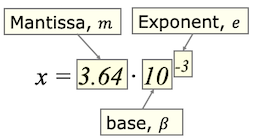

<p>In computer memory, by convention the decimal point is moved so that the digit in front of the decimal point (number '3' here), is a nonzero number. If the base is 10, i.e. a decimal number, the leading digit must be a number between 1 and 9 (between 1 and $\beta -1$ for base $\beta$). The base $\beta$ is 10 here, as we are working with decimal numbers.<br>
The meaning of the mantissa $m=3.64$ is $m=3\cdot 10^0 + 6 \cdot 10^{-1} + 4\cdot 10^{-2}$, i.e. the value of each digit in the mantissa is determined by the position and the base we are using. Thus, for any decimal number $y$
</p>

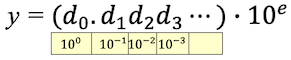

with the 'value' of the position in the yellow box under the number (meaning $d_0 \cdot 10^0 + d_1 \cdot 10^{-1} + \ldots$).

<h4>Binary numbers</h4>
<p>In computers numbers are stored as binary numbers, called <i>bits</i> (<b>b</b>inary dig<b>its</b>), made up of 0s and 1s. These correspond to the signal off and signal on state in the computer you work with. This simply means that the base is changed from $\beta=10$ to $\beta=2$, and $d_0, d_1, d_2, \ldots$ only take the values 0 or 1. A binary number $y$ will become (compare with the decimal number)</p>

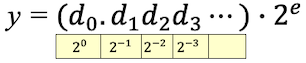

The value of the position in the yellow box as before, but here the meaning is $d_0 \cdot 2^0 + d_1 \cdot 2^{-1} + \ldots$
<p>
For simplicity, imagine we are restricted to four bits (digits) in the mantissa. Try to convert the following binary numbers in the mantissa to decimal numbers. You can do it in Python (use Python as a pocket calculator) in the cell below. The numbers are normalized, i.e. the first digit is a non-zero. As it is binary, the first number will always be a 1.
<ul>
    <li>1.001</li>
    <li>1.100</li>
    <li>1.111</li>
</ul>
</p>

In [ ]:
# Do the calculation here
print(1 * 2**0 + 1 * 2**-3)
print(1 * 2**0 + 1 * 2**-1)
print(1 * 2**0 + 1 * 2**-1 + 1 * 2**-2 + 1 * 2**-3)

1.125
1.5
1.875


<p>
Check if you got the correct result here <code>https://www.rapidtables.com/convert/number/binary-to-decimal.html</code>. Copy the adress, open a new browser window and paste the link in the new window. Enter the binary numbers and click <code>Convert</code>.
</p>

<br>
<p>For each number in the mantissa, the exponent $e$ can be chosen in different ways. For example, the full number $y$ can take values like $y=(1.001)_2 \cdot 2^2$ or $y=(1.001)_2 \cdot 2^{-4}$ etc. (the subscript '2' tells us it's a binary number). Convert these two binary numbers to decimal numbers in the cell below (in Python). Again, use Python as a pocket calculator.
    </p>

In [9]:
# Do the calculation here
print((1 * 2**0 + 1 * 2**-3) * 2**2)
print((1 * 2**0 + 1 * 2**-1) * 2**-4)

4.5
0.09375


<h4>A toy floating point system</h4>
<p>
    As soon as you type a number on the keyboard and hit the <code>Return</code>-key, the number is stored as a binary number in the computer memory. When you perform computations or series of computions, all the intermediate numbers and final reults will be stored in the computer memory as binary numbers. How these numbers are stored and represented in the computer depend on the floating point representation in your computer. We will look at that here, through a little toy floating point system. <br> <br>
The parts of the number actually stored in the memory is one sign-bit (0 equal minus, 1 equal plus), a certain number of bits representing the mantissa, and a certain number of bits representing the exponent. The yellow parts in the figure show what's stored in memory:
</p>

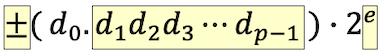

<p>Note that the first binary number $d_0$ is not stored. It is always equal to 1 (normalized floating point numbers), and therefore not necessary to store. There are a limited number of bits, $p$, representing the mantissa and this number is called <i>precision</i>. Equally, there are a limited number of bits representing the exponent.<br><br>
    We will now look at a little 'toy floating point system', which is created according to the same principles as a floating point system on your computer. Run the code in the cell below and a tiny floating point axis is drawn:
    </p>

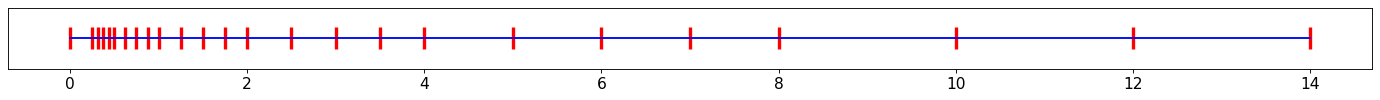

In [10]:
# Run this code to draw the number axis of the toy floating point system
# Don't change anything...
f_axis = [
    0,
    0.25,
    0.3125,
    0.375,
    0.4375,
    0.5,
    0.625,
    0.75,
    0.875,
    1.00,
    1.25,
    1.5,
    1.75,
    2.0,
    2.5,
    3.0,
    3.5,
    4,
    5,
    6,
    7,
    8,
    10,
    12,
    14,
]
plt.figure(figsize=(22, 1), dpi=80)
plt.plot(
    f_axis,
    np.zeros(len(f_axis)),
    markerfacecolor="red",
    markeredgecolor="red",
    marker="|",
    markeredgewidth=3,
    markersize=20,
)
plt.plot(f_axis, np.zeros(len(f_axis)), "b-")
plt.tick_params(left=False, labelleft=False)
plt.xticks(fontsize=14)
plt.show()

<p>The red markers show the numbers that exist on the positive side of the number axis in the toy computer memory we are looking at. The axis is mirrored on the negative side, when the sign-bit is changed to a 0.<br>
Note that...
    <ul>
        <li>It's a discrete number axis. If you, for example, would type the number 8.5 on your keyboard and hit the <code>Return</code>-key it is supposed to be stored in the computer memory, but that number does not exist on the number axis. Therefore the number can't be represented in out computer. Instead 8.5 must be rounded to the closest existing number, which is number 8, and a rounding error will be introduced.</li>
        <li>There is a largest number that can be represented, here number 14. All numbers larger than 14 are seen as infinity, $\infty$, and are called <b>overflow</b>. If we get numbers larger than 14 it will result in 'Overflow error' in Python</li>
        <li>There is a smallest normalized floating point number, which here is $(1.00)_2\cdot 2^{-2}=0.25$. The number zero is of course smaller, but is not a normalized number. It has a special representation (all bits equal to zero). The little gap between 0 and 0.25 is called <i>underflow</i>.
            <li>The numbers on the axis are not equally distributed. The axis gets more dense as we move towards zero, and more coarse as the numbers get higher. It should intuitively lead to higher roundoff error the higher the number is. We will look at that later in the lab.</li>
            </ul>
    </p>

<p>Where did we get this floating point system from? <br>
To figure it out, open the webpage <code>https://observablehq.com/@benaubin/floating-point</code> (cut and paste) in a new browser window. On that web page, set
    <ul>
        <li><i>precision</i> to 3 </li>
        <li><i>exponent bits</i> to 3</li>
        </ul>
        (Don't bother about the cells <i>hex</i> and <i>decimal value</i>)
    </p>
    <p>
    You can now see the sign-bit, three exponent-bits and two mantissa-bits (one bit is implicit as the first bit is always 1). Start with the setting according to the image below:
    </p>

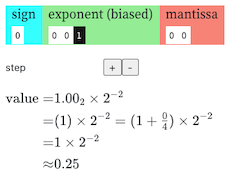

<p>This number (0.25) is the first normalized number (mantissa equal to $(1.00)_2$) that can be represented on this number axis. Step through numbers on the axis by clicking on the <code>+</code>-button, until you reach the largest number. You can see how the bits are changing, and also the corresponding decimal numbers. The numbers you get correspond to the red markers on the number axis plotted above and you can also compare with the list <code>f_axis</code> in the code. Try to understand how this particular tiny toy system works and how it lead to the number axis in the graph.<br><br>
Note that,
    <ul>
        <li>The number zero has a special representation, with all bits equal to zero (check it!). It is a 'special represention' because it is breaking the normalization convention (a leading non-sero digit).</li>
        <li>There is also a special representation for <b>NaN</b>, which stands for <i>Not A Number</i> (it will be explained what a NaN is later). How is <b>NaN</b> represented? </li>
        <li>It is possible to represent numbers in the underflow gap (between zero and 0.25). This is possible by letting go of the normalization rule, i.e. a zero is allowed as the first number in the mantissa. These numbers are called <i>subnormal</i>. Check it out!</li>  
        </ul>
    </p>

<h4>Roundoff error and machine epsilon</h4>
<p>What is the largest roundoff error we can possibly get in this toy floating point system? The biggest distance (error) seems to be if we try to store a number on higher part of the axis. For example, number 9 is located exactly in between two existing numbers on the axis, between 8 and 10. Number 9 will be rounded to either 8 or 10, let's say to 8.<br>
Calculate and print the absolute error and the relative error for this case (consider 9 as the exact value and 8 as the rounded value).    
    </p>

In [17]:
# Do the calculation here
rel_diff = abs(8 - 9) / 9
print(rel_diff)
print(abs(8 - 9))

0.1111111111111111
1


<p>Is the roundoff error smaller for smaller numbers? It should be as the axis is denser closer to zero? Let's say we try to stor a number right in between 2.0 and 2.5, i.e the number 2.25, which will be rounded to 2.0. Calculate the absolute and relative error in this case too.     
    </p>

In [15]:
# Do the calculation here
rel_diff = abs(2 - 2.25) / 2
print(rel_diff)
print(abs(2 - 2.25))

0.125
0.25


<p>Repeat again for even smaller numbers. Is the roundoff error smaller for smaller numbers? The number 1.125 is located right in between 1 and 1.25 on the floating point axis, and it will be rounded to 1.25. Again, calculate the absolute and relative error.     
    </p>

In [16]:
# Do the calculation here
rel_diff = abs(1 - 1.125) / 1
print(rel_diff)
print(abs(1 - 1.125))

0.125
0.125


<p>Conclusion: The maximum absolute roundoff error gets smaller for smaller numbers, but the maximum relative error is equal everywhere on the floating point axis. The distances between the red markers on the number axis are bigger for larger numbers, but the relative distances are equal.<br><br>
For this toy floating point system the maximum relative roundoff error is $0.111\ldots$ (you hopefull got that answer in you computations). This number is called <b>machine epsilon</b>, $\epsilon_M$, and it was something you looked at in part 1 of this lab. As you could see in part 1, for a real floating point system, $\epsilon_M \approx 10^{-16}$.<p>
    When you perform computational processes on a computer, this is approximately the magnitude of the resulting roundoff errors, although it can be worse in same cases (for different reasons).
    </p>

<hr>
<p>To summarize, the key concepts here are
    <ul>
        <li><b>Floating point numbers</b> and <b>floating point number axis</b></li>
        <li><b>Machine epsilon</b></li>
        <li><b>Overflow</b> and <b>underflow</b></li>
       </ul>
Based on the toy floating point system, you hopefully grasp what these key concepts are and where they come from.
    </p>

<p>Move on to the next part of the lab to see how the real floation point system, rather than a toy system, are built up</p>
<p>&nbsp;</p>
<hr>